<a href="https://colab.research.google.com/github/AdrienHdz/Deep_Learning_HEC/blob/master/Homework3_Graph_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning II: Deep Learning and Applications
# Graph Representation Learning

Install GraphVite and PyTorch. This may take a while.

In [ ]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!./Miniconda3-latest-Linux-x86_64.sh -b -p /usr/local -f

!conda install -y -c milagraph -c conda-forge graphvite \
  python=3.6 cudatoolkit=10.0
!conda install -y wurlitzer ipykernel

import site
site.addsitedir("/usr/local/lib/python3.6/site-packages")
%reload_ext wurlitzer

--2020-04-20 18:47:37--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | / - \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | 


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import torch
from torch import nn
from IPython.display import display, Image
%matplotlib inline
import graphvite as gv
import graphvite.application as gap

## 1. Node embedding and visualization (50 points)

### 1) Node embedding

In this part, we will implement unsupervised node embeddings, and evaluate the learned embeddings on some downstream tasks.

Common packages for implementing node embeddings include
- GraphVite: [Website][GV], [Tutorial][GV Example], [Example config][GV Config]
- PyTorch BigGraph: [Website][PBG], [Document][PBG Example], [Example config][PBG Config]
- Open NE: [Website][ONE], [Tutorial][ONE Example]

[GV]: https://graphvite.io/
[PBG]: https://torchbiggraph.readthedocs.io/
[ONE]: https://github.com/thunlp/OpenNE
[GV Example]: https://colab.research.google.com/drive/1J5sXHlMejovbYD4sHfyKUmwiUI2a8YsD#forceEdit=true&sandboxMode=true
[PBG Example]: https://torchbiggraph.readthedocs.io/en/latest/configuration_file.html
[ONE Example]: https://github.com/thunlp/OpenNE#example
[GV Config]: https://graphvite.io/docs/latest/_downloads/8e1e8548e732f2b79c8698568dbcf185/quick_start.yaml
[PBG Config]: https://github.com/facebookresearch/PyTorch-BigGraph/blob/master/torchbiggraph/examples/configs/livejournal_config.py

The following scaffold is based on GraphVite. However, you can override it with any implementation.


We carry out the experiments on BlogCatalog dataset, where each node corresponds to a blog user and each edge corresponds to their friendship. Some node has labels which indicate the user's interests.

The dataset can be found in GraphVite.

The train file contains edge list of format `[head] [tail]`.

The test file contains node labels of format `[node] [label]`. Note one node may have multiple labels.

In [ ]:
print(gv.dataset.blogcatalog.train)
print(gv.dataset.blogcatalog.label)

/root/.graphvite/dataset/blogcatalog/blogcatalog_train.txt
/root/.graphvite/dataset/blogcatalog/blogcatalog_label.txt


Now train the node embeddings. For GraphVite, the following steps are needed.

- Create a GraphApplication instance
- Load the training file to the application
- Build the application
- Train the application with hyperparameters

Implement the missing steps in the following cell.

**Note:** Due to the implementation of GraphVite, `batch_size` should always be divisible by `augmentation_step`, otherwise Colab would crash.

In [ ]:
app = gap.GraphApplication(dim=128)
app.load(file_name=gv.dataset.blogcatalog.train)
app.build()
app.train(model = "LINE")

[time] GraphApplication.load: 0.0819399 s


loading graph from /root/.graphvite/dataset/blogcatalog/blogcatalog_train.txt
0.00018755%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Graph<uint32>
------------------ Graph -------------------
#vertex: 10308, #edge: 327429
as undirected: yes, normalization: no
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


[time] GraphApplication.build: 9.14704 s


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
GraphSolver<128, float32, uint32>
----------------- Resource -----------------
#worker: 1, #sampler: 1, #partition: 1
tied weights: no, episode size: 200
gpu memory limit: 15.6 GiB
gpu memory cost: 51.5 MiB
----------------- Sampling -----------------
augmentation step: 2, shuffle base: 2
random walk length: 40
random walk batch size: 100
#negative: 1, negative sample exponent: 0.75
----------------- Training -----------------
model: LINE
optimizer: SGD
learning rate: 0.025, lr schedule: linear
weight decay: 0.005
#epoch: 2000, batch size: 100000
resume: no
positive reuse: 1, negative weight: 5
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Batch id: 0 / 6548
loss = 0
Batch id: 1000 / 6548
loss = 0.38845
Batch id: 2000 / 6548
loss = 0.382375
Batch id: 3000 / 6548
loss = 0.379006
Batch id: 4000 / 6548
loss = 0.376373
Batch id: 5000 / 6548
loss = 0.373062
Batch id: 6000 / 6548
loss = 0.36957


[time] GraphApplication.train: 31.8254 s


In [ ]:
hyperparameters = [0.1, 0.2, 0.3, 0.4]
for h in hyperparameters:
  print(app.node_classification(file_name=gv.dataset.blogcatalog.label, portions=(h,)))

effective labels: 14472 / 14476
{'macro-F1@10%': 0.21076124906539917, 'micro-F1@10%': 0.35717570781707764}
effective labels: 14472 / 14476
{'macro-F1@20%': 0.24071426689624786, 'micro-F1@20%': 0.38977330923080444}
effective labels: 14472 / 14476
{'macro-F1@30%': 0.2547849714756012, 'micro-F1@30%': 0.4039161801338196}
effective labels: 14472 / 14476
{'macro-F1@40%': 0.25989386439323425, 'micro-F1@40%': 0.4193585515022278}


Evaluate the learned embeddings on node classification task. Try to use different portions of labeled nodes to train the node classifier.

How much macro-F1 and micro-F1 do you get for different portions?

|          | 10% | 20% | 30% | 40% |
|----------|-----|-----|-----|-----|
| macro-F1 | 21%  |  24%   |  25.4% |  25.9%   |
| micro-F1 | 35.7%  |  38.9%   | 40.3%  |  41.9%   |

### 2) Visualization

In this part, we will visualize the embeddings learned in the previous problem.

Common packages for visualization include
- GraphVite (LargeVis): [Website][GV], [Tutorial][GV Example]
- tSNE-CUDA (t-SNE): [Website][TSNE], [Document][TSNE Example]
- scikit-learn (t-SNE): [Website][SK], [Document][SK Example]

[GV]: https://graphvite.io/
[TSNE]: https://github.com/CannyLab/tsne-cuda
[SK]: https://scikit-learn.org/stable/index.html

[GV Example]: https://colab.research.google.com/drive/1xRPPeCC0GxhCKpAUQblPST60_XNai2bv#forceEdit=true&sandboxMode=true
[TSNE Example]: https://github.com/CannyLab/tsne-cuda#installation
[SK Example]: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

Implement the training of the visualization algorithm.

In [ ]:
# Save the embedding as a numpy array to use it in GraphVite
np.savetxt(fname="embedding.txt",X=app.solver.vertex_embeddings)

In [ ]:
# TODO: Implement the training of visualization
app_viz = gap.VisualizationApplication(dim=2)
app_viz.load(vector_file = "embedding.txt", perplexity = 40)
app_viz.build()
app_viz.train()

loading vectors from embedding.txt
0.00970925%
building KNN graph


[time] VisualizationApplication.load: 2.47176 s
[time] VisualizationApplication.build: 0.175354 s


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
KNNGraph<uint32>
------------------ Graph -------------------
#vertex: 10308, #nearest neighbor: 200
perplexity: 40, vector normalization: yes
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
VisualizationSolver<2, float32, uint32>
----------------- Resource -----------------
#worker: 1, #sampler: 1, #partition: 1
tied weights: yes, episode size: 200
gpu memory limit: 13.6 GiB
gpu memory cost: 49.3 MiB
----------------- Sampling -----------------
positive sample batch size: 2000
#negative: 5, negative sample exponent: 0.75
----------------- Training -----------------
model: LargeVis
optimizer: Adam
learning rate: 0.5, lr schedule: linear
weight decay: 1e-05
beta1: 0.999, beta2: 0.99999, epsilon: 1e-08
#epoch: 50, batch size: 100000
resume: no
positive reuse: 5, negative weight: 3
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Batch id: 0 / 1030
loss = 0
Batch id: 1000 / 1030
loss = 0.120996


[time] VisualizationApplication.train: 4.98322 s


Visualize the coordinates as a scatter plot.

You may need to tune the `perplexity` in LargeVis / t-SNE to get a better structure.

In [ ]:
!graphvite run my_config.yaml --cpu 2 --gpu 1

Traceback (most recent call last):
  File "/usr/local/bin/graphvite", line 11, in <module>
    load_entry_point('graphvite==0.2.2', 'console_scripts', 'graphvite')()
  File "/usr/local/lib/python3.6/site-packages/graphvite/cmd.py", line 273, in main
    command[args.command](args)
  File "/usr/local/lib/python3.6/site-packages/graphvite/cmd.py", line 141, in run_main
    cfg = load_config(args.config)
  File "/usr/local/lib/python3.6/site-packages/graphvite/cmd.py", line 96, in load_config
    with open(config_file, "r") as fin:
FileNotFoundError: [Errno 2] No such file or directory: 'my_config.yaml'


In [ ]:
import pandas as pd
# Get the coordinates from visualization 
coordinates = app_viz.solver.coordinates

labels = pd.read_csv(gv.dataset.blogcatalog.label,sep="\t",header=None)

labels.drop_duplicates(subset=[0], inplace=True, ignore_index=True)



In [ ]:
# Remove outliers to make the visualization better
Y = np.array(labels[1])
mean = np.mean(coordinates, axis=0)
std = np.std(coordinates, axis=0)
outliers = np.abs(coordinates - mean) <  7  * std
indexes, = np.where(np.all(outliers, axis=1))
Y = Y[indexes]
classes = sorted(np.unique(Y))

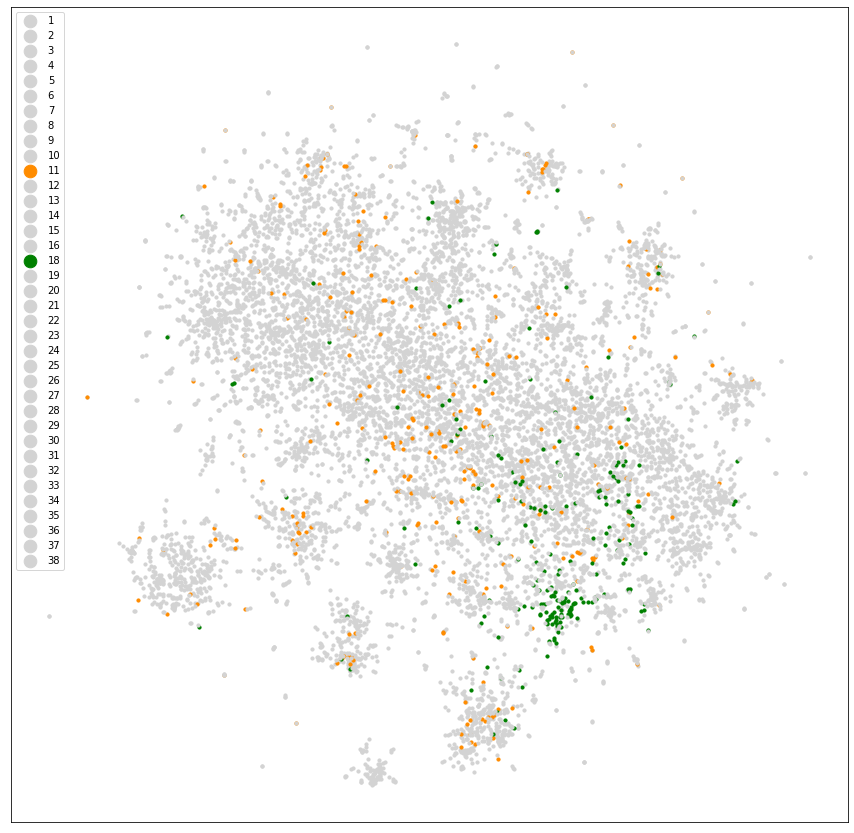

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
for classe in classes:
  if classe ==11:
    color = "darkorange"
  elif classe ==18 :
    color = "green"
  else :
    color ="lightgrey"

  
  indexes, = np.where(Y == classe)
  ax.scatter(*coordinates[indexes].T, 
             s=10, 
             color=color,
             alpha=1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend(classes, markerscale=4);


Use the node classification labels to pick two classes of nodes. Color these nodes in the plot.

**Hint**: For those belonging to both classes, you can randomly assign it to one class, or use a third color to denote them.

Are the node embeddings learned from BlogCatalog good? Why or why not?

**Answer:** I would say they are more or less good. We can see on the visualization that some clusters has been formed by the model built on GraphVite. However, the algorithm had troubles to put the clusters into the correct classes as we can see that the classe 11 (orange dots) are spread out almost everywhere. The class 18 is better plotted has we can see a small cluster of green dot at the bottom of the visualization.

## 2. Graph Convolutional Networks (50 points)

For this part, we are going to implement the GCN model for node classification, where the Cora dataset is used for testing the model. 

The Cora dataset is avaible [here](https://drive.google.com/open?id=1wVguWcuHEfga09XgLPvC_PkRXTGEEInW). You could find several files there. Among those files, net.txt provides the edges between different nodes, and the three columns correspond to source nodes, target nodes and edge weights respectively. For feature.txt, it gives the features of nodes. For label.txt, it provides the node labels. train.txt, valid.txt, test.txt provide the training nodes, validation nodes and test nodes respectively.

The goal is to train a model on the training nodes, and further apply the model for classifying test nodes. In this process, you may use the validation nodes for hyper-parameter tuning and early stopping.

### 1) Implement the GCN model

In the first step, please implement a GCN model in the following code block.

In [ ]:
# TODO: Implement GCN here
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]

     |████████████████████████████████| 348 kB 4.5 MB/s 
     |████████████████████████████████| 24.2 MB 73 kB/s 
     |████████████████████████████████| 421.8 MB 25 kB/s 
     |████████████████████████████████| 1.6 MB 50.0 MB/s 
     |████████████████████████████████| 10.0 MB 63.9 MB/s 
     |████████████████████████████████| 7.1 MB 49.4 MB/s 
     |████████████████████████████████| 215 kB 72.6 MB/s 
     |████████████████████████████████| 231 kB 67.0 MB/s 
     |████████████████████████████████| 3.6 MB 50.4 MB/s 
     |████████████████████████████████| 105 kB 68.8 MB/s 
     |████████████████████████████████| 57 kB 5.8 MB/s 
     |████████████████████████████████| 448 kB 63.1 MB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
     |████████████████████████████████| 41 kB 789 kB/s 
     |████████████████████████████████| 3.8 MB 46.3 MB/s 
     |████████████████████████████████| 2.8 MB 55.5 MB/s 
     |████████████████████████████████| 104 kB 78.4 MB/s 
     |███████████████

In [ ]:
import pandas as pd
import os

import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

2020-04-20 19:04:08.818895: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
# Loading the librairies
feature = pd.read_csv("feature.txt",sep="\t",header=None)
label = pd.read_csv("label.txt",sep="\t",header=None)
net = pd.read_csv("net.txt",sep="\t",header=None)
test = pd.read_csv("test.txt",sep="\t",header=None)
train = pd.read_csv("train.txt",sep="\t",header=None)
valid = pd.read_csv("valid.txt",sep="\t",header=None)

In [ ]:
feature[1] = feature[1].str.replace(':1.0', '').astype(str)
feature[1]

0                    19 81 146 315 774 877 1194 1247 1274
1       19 88 149 212 233 332 336 359 472 507 548 687 ...
2       19 89 128 322 381 480 507 551 647 702 715 912 ...
3       93 283 359 402 452 470 507 540 715 721 723 814...
4       3 81 337 586 698 747 819 860 893 1060 1171 117...
                              ...                        
2703    5 19 182 187 301 317 402 536 591 774 877 891 9...
2704               2 140 205 335 1042 1247 1249 1308 1402
2705    64 207 262 697 753 872 877 1096 1118 1123 1172...
2706    19 247 498 520 774 775 813 953 960 1042 1171 1...
2707    19 186 329 447 454 754 774 896 1022 1114 1328 ...
Name: 1, Length: 2708, dtype: object

In [ ]:
# Tokenization
from keras.preprocessing.text import Tokenizer

tokenizer_inputs = Tokenizer()
tokenizer_inputs.fit_on_texts(feature[1])
feature["sequence"] = tokenizer_inputs.texts_to_sequences(feature[1])
feature

,0,1,sequence
0,0,19 81 146 315 774 877 1194 1247 1274,"[5, 282, 653, 578, 8, 196, 299, 94, 48]"
1,1,19 88 149 212 233 332 336 359 472 507 548 687 ...,"[5, 151, 322, 410, 256, 907, 67, 128, 461, 3, ..."
2,2,19 89 128 322 381 480 507 551 647 702 715 912 ...,"[5, 129, 227, 489, 262, 453, 3, 454, 31, 117, ..."
3,3,93 283 359 402 452 470 507 540 715 721 723 814...,"[60, 300, 128, 186, 854, 238, 3, 18, 69, 411, ..."
4,4,3 81 337 586 698 747 819 860 893 1060 1171 117...,"[158, 282, 634, 371, 66, 580, 187, 44, 268, 16..."
...,...,...,...
2703,2703,5 19 182 187 301 317 402 536 591 774 877 891 9...,"[1135, 5, 437, 73, 357, 1037, 186, 137, 163, 8..."
2704,2704,2 140 205 335 1042 1247 1249 1308 1402,"[165, 116, 80, 391, 702, 94, 30, 90, 1166]"
2705,2705,64 207 262 697 753 872 877 1096 1118 1123 1172...,"[244, 724, 304, 193, 1272, 596, 196, 118, 29, ..."
2706,2706,19 247 498 520 774 775 813 953 960 1042 1171 1...,"[5, 269, 1099, 667, 8, 706, 250, 716, 589, 702..."


In [ ]:
feature_names = ["w_{}".format(ii) for ii in range(1433)]
# We create the node data DataFrame according to Stellargraph tutorial
# For each title id, we count the number of times that a word is present in the title and we create a matrix.
node_data = pd.DataFrame(tokenizer_inputs.texts_to_matrix(feature[1], mode='count'),
                                 dtype=int,columns=feature_names,
                                 index=feature.index)
node_data

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15,w_16,w_17,w_18,w_19,w_20,w_21,w_22,w_23,w_24,w_25,w_26,w_27,w_28,w_29,w_30,w_31,w_32,w_33,w_34,w_35,w_36,w_37,w_38,w_39,...,w_1393,w_1394,w_1395,w_1396,w_1397,w_1398,w_1399,w_1400,w_1401,w_1402,w_1403,w_1404,w_1405,w_1406,w_1407,w_1408,w_1409,w_1410,w_1411,w_1412,w_1413,w_1414,w_1415,w_1416,w_1417,w_1418,w_1419,w_1420,w_1421,w_1422,w_1423,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2705,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2706,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# for each tokenizer_inputs we store its word index into a new DataFrame called word2index_inputs
word2index_inputs = tokenizer_inputs.word_index

# We determine the maximul length of our dataset
max_len_input = max(len(s) for s in feature["sequence"])
print(f'The longest title contains {max_len_input} tokens')


The longest title contains 30 tokens


In [ ]:
node_subjects = label
node_subjects.index = node_subjects[0]
del node_subjects[0]
node_subjects.index.names = ['id']
set(node_subjects)
node_subjects

,1
id,
0,3
1,4
2,4
3,0
4,3
...,...
2703,3
2704,3
2705,3


In [ ]:
# We create the edge list, with 3 columns, source, target and the weight between both. Here the weight is 1 for all the connections so it is not meaningful
edgelist = net.reset_index(drop=True)
edgelist = edgelist.rename(columns={0: 'source',1: 'target',2: 'weight'})
edgelist

,source,target,weight
0,0,633,1
1,0,1862,1
2,0,2582,1
3,1,2,1
4,1,652,1
...,...,...,...
10551,2706,2707,1
10552,2707,165,1
10553,2707,598,1
10554,2707,1473,1


In [ ]:
G = sg.StellarGraph(nodes={"paper": node_data},
                    edges={"citation" : edgelist},
                    edge_weight_column="weight")
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 2708, Edges: 10556

 Node types:
  paper: [2708]
    Features: float32 vector, length 1433
    Edge types: paper-citation->paper

 Edge types:
    paper-citation->paper: [10556]


In [ ]:
training_subjects = node_subjects[node_subjects.index.isin(train.index)]
validation_subjects = node_subjects[node_subjects.index.isin(valid.index)]
test_subjects = node_subjects[node_subjects.index.isin(test.index)]

In [ ]:
# We convert to numeric arrays. 
# The target variable is transformed into hot-one vectors.

target_encoding = preprocessing.LabelBinarizer()

train_targets = target_encoding.fit_transform(training_subjects)
validation_targets = target_encoding.fit_transform(validation_subjects)
test_targets = target_encoding.transform(test_subjects)

In [ ]:
# We use the FullBatchNodeGenerator function using the gcn method to put our data under the correct shape for a GCN model.
generator = FullBatchNodeGenerator(G, method="gcn")

Using GCN (local pooling) filters...


In [ ]:
# We create an object forh the generator.flow function with the set of nodes and the true labels that will be used to train the model.
train_gen = generator.flow(training_subjects.index, train_targets)
valid_gen = generator.flow(validation_subjects.index, validation_targets)
test_gen = generator.flow(test_subjects.index, test_targets)

In [ ]:
gcn = GCN(
    layer_sizes=[128, 128] , activations=["relu", "relu"], generator=generator, dropout=0.5
)

In [ ]:
# We create the input and output tensors that our model will use for its predictions.
x_inp, x_out = gcn.in_out_tensors()

In [ ]:
# The output layer will be a softmax 
predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

In [ ]:
# We create the keras model
model = Model(inputs=x_inp, outputs=predictions)
model.compile(
    optimizer=optimizers.Adamax(lr=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

In [ ]:
# We will use a callback if validation accuracy stops improving
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor="val_acc", patience=20, restore_best_weights=True)

In [ ]:
# We train our model
# We look for cell output convenience
layer_size = 16; activation_function = "relu"
layers_size_list = []; activation_function_list = []; test_accuracy_list = []
for i in range(10):
  layers_size_list.append(layer_size)
  activation_function_list.append(activation_function)
  gcn = GCN(
      layer_sizes=layers_size_list, activations=activation_function_list, generator=generator, dropout=0.5)
  x_inp, x_out = gcn.in_out_tensors()
  predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

  model = Model(inputs=x_inp, outputs=predictions)
  model.compile(
      optimizer=optimizers.Adamax(lr=0.01),
      loss=losses.categorical_crossentropy,
      metrics=["acc"])
  history = model.fit(
      train_gen,
      epochs=300,
      validation_data=valid_gen,
      verbose=2,
      shuffle=False, 
      callbacks=[es_callback])
  test_accuracy_list.append(model.evaluate(test_gen)[1])


Epoch 1/300
1/1 - 0s - loss: 1.9464 - acc: 0.1143 - val_loss: 1.8908 - val_acc: 0.4080
Epoch 2/300
1/1 - 0s - loss: 1.8594 - acc: 0.4500 - val_loss: 1.8376 - val_acc: 0.5380
Epoch 3/300
1/1 - 0s - loss: 1.7637 - acc: 0.6643 - val_loss: 1.7804 - val_acc: 0.5840
Epoch 4/300
1/1 - 0s - loss: 1.6836 - acc: 0.7500 - val_loss: 1.7224 - val_acc: 0.6100
Epoch 5/300
1/1 - 0s - loss: 1.5766 - acc: 0.8071 - val_loss: 1.6658 - val_acc: 0.6240
Epoch 6/300
1/1 - 0s - loss: 1.4776 - acc: 0.8500 - val_loss: 1.6111 - val_acc: 0.6400
Epoch 7/300
1/1 - 0s - loss: 1.3998 - acc: 0.8429 - val_loss: 1.5580 - val_acc: 0.6520
Epoch 8/300
1/1 - 0s - loss: 1.3107 - acc: 0.8571 - val_loss: 1.5065 - val_acc: 0.6640
Epoch 9/300
1/1 - 0s - loss: 1.2208 - acc: 0.8357 - val_loss: 1.4560 - val_acc: 0.6760
Epoch 10/300
1/1 - 0s - loss: 1.1482 - acc: 0.8929 - val_loss: 1.4066 - val_acc: 0.6940
Epoch 11/300
1/1 - 0s - loss: 1.0430 - acc: 0.9500 - val_loss: 1.3575 - val_acc: 0.7140
Epoch 12/300
1/1 - 0s - loss: 0.9894 - ac

In [ ]:
# Print the test accuracy
test_accuracy_list

[0.793749988079071,
 0.8296874761581421,
 0.8218749761581421,
 0.793749988079071,
 0.7593749761581421,
 0.778124988079071,
 0.746874988079071,
 0.3531250059604645,
 0.5796874761581421,
 0.2874999940395355]

### 2) Performance w.r.t. the number of layers

Most GNN models only use a few layers for information propagation. Otherwise, they may suffer from the over-smoothing problem. To look into that, please fill in the following table to show the performance of your GNN model with respect to the number of propagation layers.

|               | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10|
|---------------|---|---|---|---|---|---|---|---|---|---|
| Test Accuracy | 79.3%  | 82.9%  |  82.1% | 79.3%  | 75.9%  | 77.8%  | 74.6%  |  35.3% | 57.9%  | 28.7%  |



Given the above result, please write down your observation and the potential reason based on your understanding.

**Observations:** We can see that by adding a second layer the test accuracy increased from 79.3% (1 layer) to 82.9% (2 layers). We can observe that it was beneficial. However, adding more than 2 layers started to decrease "exponentially" the the test accuracy down to 28.7% for the 10th layer!

**Reasons:** Regarding GCN, when we start addding layers, we face a problem called over-smoothing. Indeed, the model performance decreases as in deep layers, the useful nodes representation becomes indistinguishable. Therefore, the information doesn't propagate well in the network anymore. 

In [ ]:
# We train our model
# We look for cell output convenience
hidden_dimensions = [4, 8, 16, 32, 64, 128]; test_accuracy_list = []
for h in hidden_dimensions:
  gcn = GCN(
      layer_sizes=[h, h], activations=["relu", "relu"], generator=generator, dropout=0.5)
  x_inp, x_out = gcn.in_out_tensors()
  predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

  model = Model(inputs=x_inp, outputs=predictions)
  model.compile(
      optimizer=optimizers.Adamax(lr=0.01),
      loss=losses.categorical_crossentropy,
      metrics=["acc"])
  history = model.fit(
      train_gen,
      epochs=300,
      validation_data=valid_gen,
      verbose=2,
      shuffle=False, 
      callbacks=[es_callback])
  test_accuracy_list.append(model.evaluate(test_gen)[1])


Epoch 1/300
1/1 - 0s - loss: 1.9405 - acc: 0.1500 - val_loss: 1.9317 - val_acc: 0.2120
Epoch 2/300
1/1 - 0s - loss: 1.9214 - acc: 0.2357 - val_loss: 1.9170 - val_acc: 0.2340
Epoch 3/300
1/1 - 0s - loss: 1.9049 - acc: 0.2214 - val_loss: 1.8972 - val_acc: 0.2780
Epoch 4/300
1/1 - 0s - loss: 1.8924 - acc: 0.2286 - val_loss: 1.8722 - val_acc: 0.3140
Epoch 5/300
1/1 - 0s - loss: 1.8742 - acc: 0.2571 - val_loss: 1.8482 - val_acc: 0.3240
Epoch 6/300
1/1 - 0s - loss: 1.8459 - acc: 0.2643 - val_loss: 1.8244 - val_acc: 0.3380
Epoch 7/300
1/1 - 0s - loss: 1.8315 - acc: 0.2571 - val_loss: 1.8026 - val_acc: 0.3480
Epoch 8/300
1/1 - 0s - loss: 1.7961 - acc: 0.2571 - val_loss: 1.7829 - val_acc: 0.3520
Epoch 9/300
1/1 - 0s - loss: 1.7660 - acc: 0.2643 - val_loss: 1.7643 - val_acc: 0.3520
Epoch 10/300
1/1 - 0s - loss: 1.7882 - acc: 0.2643 - val_loss: 1.7469 - val_acc: 0.3480
Epoch 11/300
1/1 - 0s - loss: 1.7485 - acc: 0.2857 - val_loss: 1.7304 - val_acc: 0.3400
Epoch 12/300
1/1 - 0s - loss: 1.7068 - ac

In [ ]:
test_accuracy_list

[0.7250000238418579,
 0.809374988079071,
 0.8140624761581421,
 0.839062511920929,
 0.832812488079071,
 0.8343750238418579]

### 3) Performance w.r.t. the hidden dimension

Another important hyperparameter for graph neural networks is the dimension of hidden layers. In this part, you need to try different dimensions for the hidden layers, and further fill in the table below.

|               | 4 | 8 | 16| 32| 64|128|
|---------------|---|---|---|---|---|---|
| Test Accuracy | 72.5%  | 80.9%  | 81.4%  | 83.9%  | 83.2%  | 83.4%  |



Given the above result, please write down your observation and the potential reason based on your understanding.

**Observations:** We can see that for our data, increasing the layers hidden dimension was beneficial as the test accuracy increased by a large amount (72.5% for two layers with dimension 4 and 83.9% for 2 layers with dimension 32). However, the model performance started to decreased when dimensions became larger than 32, meaning that the model started to overfit.

**Reasons:** Larger hidden dimensions help capture more complexity in the dataset this is why our model accuracy increased as the same time as the hidden dimensions increased. However, we don't have a very large dataset this is why when our hidden dimensions become too large such as (64 and 128) the test accuracy started to decrease since our model started to overfit the data.